In [1]:
from processing.polyphony import *
import processing.polyphony as pp 


In [2]:
#output_sequence_len = 0 if not encoder_decoder else >=1

# Data INFO
# ~175K midi files  
# Files could be short melodies, loop compositions or long symphonies or songs
# ~10K midi files in each of the 16 top level subdirectories 
# Considering 300 midi files at present, at 8 resolution..~ 0.2% Dataset
# Generating a polyphonic monophony music (multiple instruments each following a monophonic melody line independently) or type of contrapuntal 
train_source, val_source, test_source  = sample_dataset('./lpd_5/all', nsamples=100, train_size=0.9, val_size=0.2, input_sequence_len=100, output_sequence_len=100, resolution=8, batch_size=128, encoder_decoder=True)

Preparing test dataset...: 100%|██████████| 10/10 [00:01<00:00,  5.98it/s]


In [3]:
train_source = ('lpd_5_batched/train_inputs', 'lpd_5_batched/train_outputs')
music_loader = load_music_batches(*train_source, encoder_decoder=True)
steps = len(os.listdir(train_source[0]))-1
steps


13230

In [5]:
pp.vocab['last']

2127

In [4]:
val_source = ('lpd_5_batched/val_inputs', 'lpd_5_batched/val_outputs')
val_music_loader = load_music_batches(*val_source, encoder_decoder=True)
val_steps = len(os.listdir(val_source[0]))-1
val_steps

3337

In [6]:
from models import transformer_encoder_decoder
model = transformer_encoder_decoder(music_dim=pp.vocab['last']+1)
model.summary()

Using TensorFlow backend


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 1)]            0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None, 1)]            0         []                            
                                                                                                  
 time_distributed (TimeDist  (None, None, 100)            212800    ['input_1[0][0]']             
 ributed)                                                                                         
                                                                                                  
 time_distributed_1 (TimeDi  (None, None, 100)            212800    ['input_2[0][0]']         

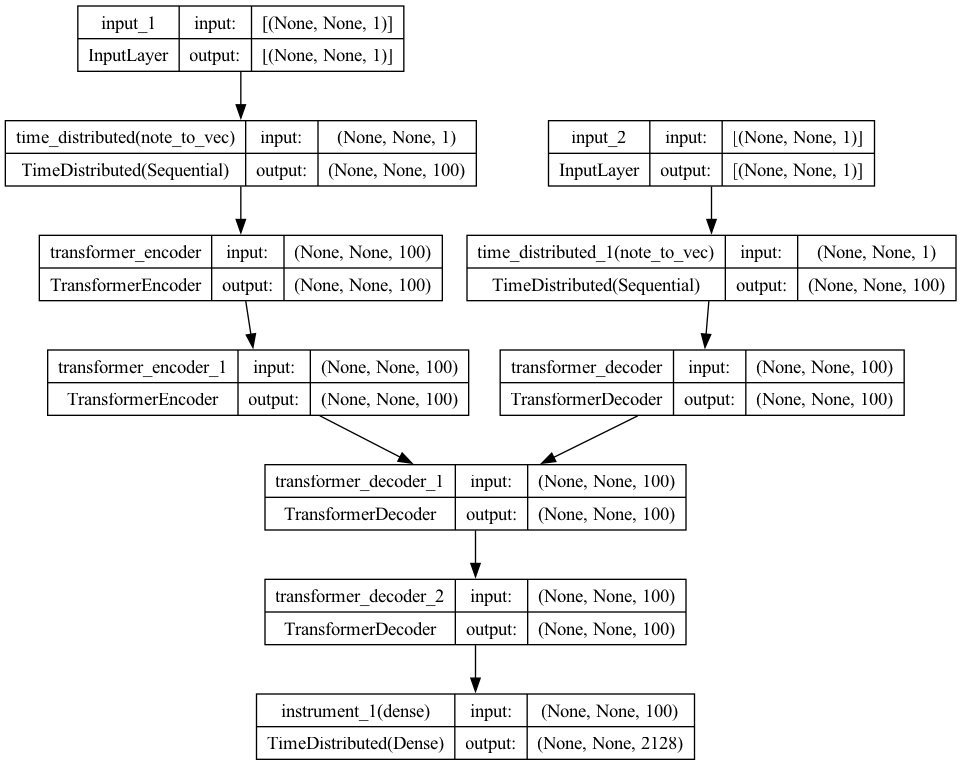

In [7]:
tf.keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)

In [8]:
import tensorflow as tf
import os


class ModelCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, model, checkpoint_dir, save_best_only=True):
        super(ModelCheckpoint, self).__init__()
        self.model = model
        self.checkpoint_dir = checkpoint_dir
        self.save_best_only = save_best_only
        self.best_val_loss = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs.get('val_loss')
        if self.save_best_only and val_loss < self.best_val_loss:
            self.best_val_loss = val_loss
            filepath = os.path.join(self.checkpoint_dir, f"best_model.keras")
            self.model.save(filepath, overwrite=True)
            print(f"Saved model to {filepath} (val_loss: {val_loss:.4f})")
        else:
            filepath = os.path.join(self.checkpoint_dir, f"model_epoch_{epoch}.keras")
            self.model.save(filepath, overwrite=True)
            print(f"Saved model to {filepath} (val_loss: {val_loss:.4f})")

modelname = "encoder-decoder-transformer-10Ksamples-1instrument-longer-2"
checkpoint_dir = f"./{modelname}-checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
model_checkpoint = ModelCheckpoint(model, checkpoint_dir)
callbacks_list = [model_checkpoint]   



In [9]:
history = model.fit(music_loader, steps_per_epoch=steps, validation_data=val_music_loader, validation_steps=val_steps, epochs=50, callbacks=callbacks_list)

Epoch 1/50
 1936/13230 [===>..........................] - ETA: 1:20:42 - loss: 4.3503 - accuracy: 0.3463

KeyboardInterrupt: 

In [12]:
model.save(modelname)

INFO:tensorflow:Assets written to: encoder-decoder-transformer-10Ksamples-1instrument-longer-2/assets


INFO:tensorflow:Assets written to: encoder-decoder-transformer-10Ksamples-1instrument-longer-2/assets


In [9]:
model = tf.keras.models.load_model(modelname)

In [3]:
tracks = sample_track('lpd_5/all', nsamples=100, input_sequence_len=10, resolution=8)

Sampling tracks...:   0%|          | 0/100 [00:00<?, ?it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:   4%|▍         | 4/100 [00:00<00:13,  7.24it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:   5%|▌         | 5/100 [00:00<00:16,  5.78it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  11%|█         | 11/100 [00:01<00:11,  7.59it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  15%|█▌        | 15/100 [00:02<00:10,  7.80it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  19%|█▉        | 19/100 [00:02<00:11,  6.94it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  21%|██        | 21/100 [00:03<00:12,  6.50it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  27%|██▋       | 27/100 [00:03<00:07, 10.34it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  30%|███       | 30/100 [00:03<00:07,  9.46it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  36%|███▌      | 36/100 [00:05<00:10,  6.00it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  43%|████▎     | 43/100 [00:06<00:13,  4.11it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  54%|█████▍    | 54/100 [00:08<00:05,  8.13it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  61%|██████    | 61/100 [00:09<00:06,  6.32it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  76%|███████▌  | 76/100 [00:11<00:04,  5.92it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set
cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  84%|████████▍ | 84/100 [00:13<00:03,  5.01it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  87%|████████▋ | 87/100 [00:14<00:03,  3.77it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...:  89%|████████▉ | 89/100 [00:14<00:02,  4.66it/s]

cannot call `vectorize` on size 0 inputs unless `otypes` is set


Sampling tracks...: 100%|██████████| 100/100 [00:16<00:00,  5.92it/s]


In [4]:
tracks

[(array([[  48],
         [  43],
         [  48],
         [  43],
         [  48],
         [  43],
         [  48],
         [1207],
         [1214],
         [1793]]),
  array([[2022],
         [ 715],
         [2022],
         [1426],
         [  48],
         [2127],
         [ 956],
         [2126],
         [  43],
         [1214],
         [  43],
         [2022],
         [ 864],
         [1614],
         [ 718],
         [2126],
         [2126],
         [  71],
         [  67],
         [2126],
         [2124],
         [1214],
         [1793],
         [2022],
         [ 715],
         [2022],
         [1426],
         [  48],
         [2127],
         [2126],
         [  71],
         [2126],
         [1988],
         [2126],
         [ 956],
         [2126],
         [  43],
         [1214],
         [2126],
         [2127],
         [ 622],
         [ 474],
         [ 452],
         [2126],
         [ 404],
         [1426],
         [ 750],
         [2126],
         [14

In [5]:
x, y = tracks[randint(0, len(tracks)-1)]
#composer = compose_music(music_model=model, cue=x, output_seq_len=200, topn=129, encoder_decoder=True, print_gen=True, cue_tokenized=True)

x.shape, y.shape

((10, 1), (445, 1))

In [ ]:
total_track_length = y.shape[0]
composition_length = int(0.5*total_track_length)
TEMPO = 60

print(f"Composing for {composition_length} time steps at {TEMPO} bpm")
for _ in range(composition_length):
    composition = next(composer)
    print(composition[-1])
  


output_midi_path = f'generated_track_transformer.mid'
output_audio_path = f'generated_track_transformer.wav'

print("Composition Done...")
generated_track = make_track(composition, tempo=TEMPO)
print("Track Done...")

multitrack_to_midi(generated_track, output_midi_path)
print("Generated Midi file Done...")

midi_to_wav(output_midi_path, output_audio_path)
print("Generated Audio file Done...")



output_midi_path = 'original_track_transformer.mid'
output_audio_path = 'original_track_transformer.wav'

original_track = make_track(composition=y[:composition_length], tempo=TEMPO, composition_tokenized=False)
print("Original Track Done...")

multitrack_to_midi(original_track, output_midi_path)
print("Original Midi file Done...")
midi_to_wav(output_midi_path, output_audio_path)
print("Original Audio file Done...")

In [9]:
import pypianoroll as ppr 
import matplotlib.pyplot as plt


track = ppr.load('lpd_5/lpd_5_full/0/0a0a2b0e4d3b7bf4c5383ba025c4683e.npz')
from music21 import converter, instrument, note, chord, midi
import os 

notes = []
chords = []
file = 'generated_track_transformer.mid'

midii = midi.MidiTrack(track.to_pretty_midi())

notes_to_parse = None
parts = instrument.partitionByInstrument(midii)
if parts: # file has instrument parts
    notes_to_parse = parts.parts[0].recurse()
else: # file has notes in a flat structure
    notes_to_parse = midii.flat.notes
for element in notes_to_parse:
    if isinstance(element, note.Note):
        print(element.duration.quarterLength)
        notes.append(str(element.pitch))
    elif isinstance(element, chord.Chord):
        chords.append('.'.join(str(n) for n in element.pitches))


AttributeError: 'MidiTrack' object has no attribute 'hasPartLikeStreams'

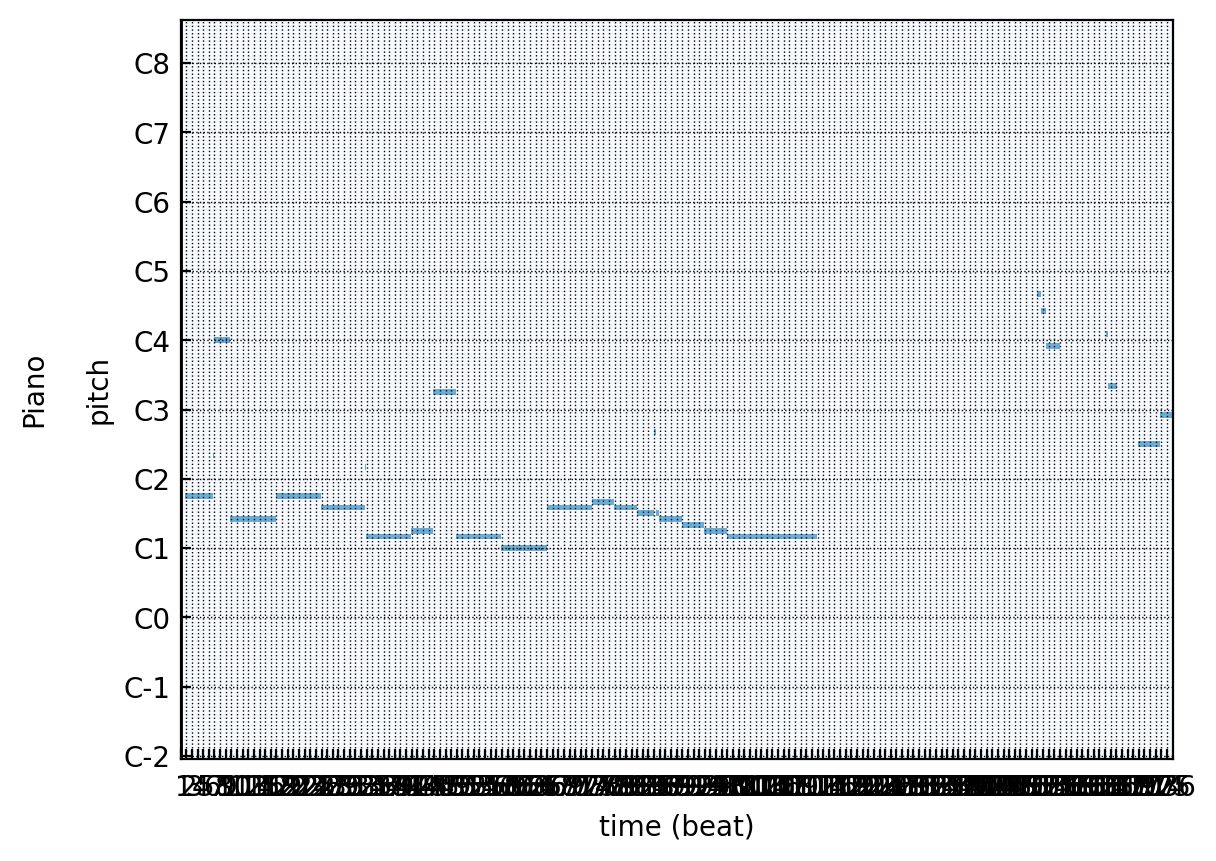

In [91]:
import pypianoroll as ppr 
import matplotlib.pyplot as plt


track = ppr.read('original_track_transformer.mid')

ppr.plot(track)
plt.show()
